# Crystalline Hybrid Code - Initial
### Joseph Matson, Caldwell Lab, Vanderbilt University

The goal is to use pymatgen to get the phonon dispersion from the Materials Project Database

**requires:** PyMatGen

In [143]:
from pymatgen import MPRester, Composition

import matplotlib.pyplot as plt
import re
import pprint

# Make sure that you have the Materials API key. Put the key in the call to
# MPRester if needed, e.g, MPRester("MY_API_KEY")
mpr = MPRester("NOFH8IOTvxxKZz2Tfg")
%matplotlib inline

# Find materials at https://materialsproject.org/

In [15]:
#Materials

GaSb = "mp-1156" #no phonon dispersion
AlSb = "mp-2624" 
InAs = "mp-20305"#no phonon dispersion

GaN = "mp-804"
AlN = "mp-661"

SiC_4H = "mp-11714"
SiC_6H = "mp-7631"

In [52]:
#get phonon band structure
GaN_PBS = mpr.get_phonon_bandstructure_by_material_id(GaN)
AlN_PBS = mpr.get_phonon_bandstructure_by_material_id(AlN)

In [218]:
from pymatgen.phonon.plotter import PhononBSPlotter
GaN_plotter = PhononBSPlotter(GaN_PBS)
AlN_plotter = PhononBSPlotter(AlN_PBS)
# GaN_plotter.get_plot(ylim=[0,750], units="cm^-1").show()
# AlN_plotter.get_plot(ylim=None, units="cm^-1").show()

# GaN_plotter.plot_compare(AlN_plotter)  # Doesn't work because they aren't on the same symmetry lines?

AlN_plotter.bs_plot_data()

#AlN_plotter.plot_brillouin()

{'ticks': {'distance': [0.0,
   1.1652228230083836,
   1.1652228230083836,
   1.8379645335279673,
   1.8379645335279673,
   3.183447954577561,
   3.183447954577561,
   3.813904669985556,
   3.813904669985556,
   4.979127492993943,
   4.979127492993943,
   5.651869203513526,
   5.651869203513526,
   6.997352624563115,
   7.627809339971113,
   8.25826605537911],
  'label': ['$\\Gamma$',
   'M',
   'M',
   'K',
   'K',
   '$\\Gamma$',
   '$\\Gamma$',
   'A',
   'A',
   'L',
   'L',
   'H',
   'H',
   'A$\\mid$L',
   'M$\\mid$K',
   'H']},
 'distances': [[0.0,
   0.05548680109674705,
   0.11097360219116366,
   0.16646040328791073,
   0.22194720438232732,
   0.27743400548373526,
   0.33292080658048234,
   0.3884076076772293,
   0.44389440877397635,
   0.4993812098707234,
   0.5548680109674704,
   0.610354812040913,
   0.6658416131376602,
   0.7213284142344072,
   0.776815215331154,
   0.8323020164279011,
   0.8877888175246483,
   0.9432756186213953,
   0.9987624197181425,
   1.0542492208148

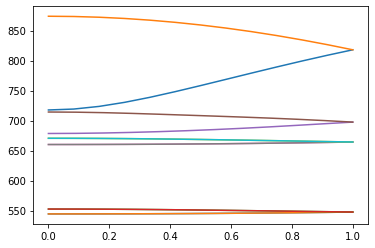

In [207]:
dict1 = GaN_plotter.bs_plot_data()
dict2 = AlN_plotter.bs_plot_data()
#get Gamma to A (out of plane?)

dist1 = dict1.get('distances')[3]
freq1 = dict1.get('frequency')[3]
dist2 = dict2.get('distances')[3]
freq2 = dict2.get('frequency')[3]


n_dist1 = [(d - dist1[0]) / (dist1[-1] - dist1[0]) for d in dist1]
n_dist2 = [(d - dist2[0]) / (dist2[-1] - dist2[0]) for d in dist2]

for line in freq1[6:]:
    line = [f * 33.35641 for f in line] #unit conversion to Wavenumbers
    plt.plot(n_dist1, line)
    
for line in freq2[6:]:
    line = [f * 33.35641 for f in line] #unit conversion to Wavenumbers
    plt.plot(n_dist2, line)
    

## Let's try to sample the phonon dispersion to get confined phonon frequencies.

# <center> **$k_{m}$ = $\frac{\pi m}{(n + \delta)d_{0}}$**</center>

Text(0.5, 1.0, 'GaN confinement')

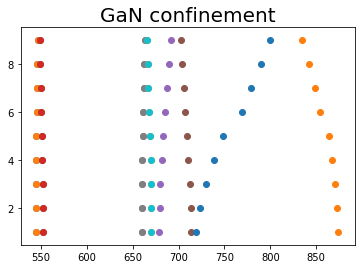

In [209]:
n_dist.index(min(n_dist , key=lambda x:abs(x-0.46)))
#Let's get the "confined" phonons here for a layer thickness...
n = 10 #ML
ms = list(range(1,thickness))
ks = []
d0 = 3 #lattice constant?
delta = 1
conf = []
for m in ms:
    ks.append(m / ((n+delta)))

for line in freq1[6:]:
    conf1 = []
    for k in ks:
        i = n_dist1.index(min(n_dist1 , key=lambda x:abs(x-k)))
        conf1.append(line[i])
    conf.append(conf1)
for line in freq2[6:]:
    conf1 = []
    for k in ks:
        i = n_dist2.index(min(n_dist2 , key=lambda x:abs(x-k)))
        conf1.append(line[i])
    conf.append(conf1)
    
for line in conf:
    line = [f * 33.35641 for f in line] #unit conversion to Wavenumbers

    plt.scatter(line, ms)

plt.title("GaN confinement", size = 20)

